# Test Effect of Spectrum And Taper

### Import necessary packages

In [75]:
import sys
sys.path.append("G:\\Research\\Freq-Domain\\Godzilla\\Python")

In [76]:
from Utilities import WaveletTools
from Common import Common
import numpy as np
import matplotlib.pyplot as plt

### Define paramters

In [77]:
freq_peak = 20
freq_max = 30
freq_min = 4
flat_spectrum = False
omega_max = 2 * Common.pi * freq_max
omega_min = 2 * Common.pi * freq_min
dt = 0.5 / freq_max
nt = 100
domega = (2 * Common.pi) / (nt * dt)
delay = 0.1

In [78]:
print("Frequency range :")
print("omega_min = " + "{:5.3f}".format(omega_min) + " rad/s" + " , omega_max = " + "{:5.3f}".format(omega_max) + " rad/s")

print("\n")
print("Frequency sampling :")
print("domega = " + "{:5.3f}".format(domega) + " rad/s" + " , df = " + "{:5.3f}".format(domega / (2 * Common.pi)) + " Hz")

print("\n")
print("Time sampling :")
print("dt = " + "{:5.3f}".format(dt) + " s")

Frequency range :
omega_min = 25.133 rad/s , omega_max = 188.496 rad/s


Frequency sampling :
domega = 3.770 rad/s , df = 0.600 Hz


Time sampling :
dt = 0.017 s


### Helper Functions

In [79]:
def convert_2_time(value_list, omega_list, domega, N):
    
    omega_positive = [domega * i for i in range(N + 1)]
    value_postive = [0.0 for i in range(N + 1)]
    
    omega_min = min(omega_list)
    omega_max = max(omega_list)
    
    omega_interp = [omega for omega in omega_positive if omega_min <= omega <= omega_max]
    value_interp = np.interp(x=omega_interp, xp=omega_list, fp=value_list)
    
    indices_interp = [i for i, omega in enumerate(omega_positive) if omega_min <= omega <= omega_max]
    index_start = min(indices_interp)
    index_end = max(indices_interp) + 1
    value_postive[index_start: index_end] = value_interp
    
    temp_values = value_postive[1: (N + 1)]
    reversed_values = temp_values[::-1]
    
    time_values = np.fft.irfft(np.asarray(value_postive))
    time_values = np.roll(time_values, int(len(time_values) / 2) + 1)
    
    return time_values

def plot_ricker(domega, omega_min, omega_max, freq_peak):
    
    omega_list = np.arange(omega_min, omega_max, domega).tolist()
    freq_list = [omega / (2 * Common.pi) for omega in omega_list]
    ricker_wavelet = [
        np.real(
            WaveletTools.ricker_wavelet_coefficient(omega=omega, omega_peak=2 * Common.pi * freq_peak)
        ) for omega in omega_list
    ]
    
    ricker_wavelet_time = convert_2_time(ricker_wavelet, omega_list, domega, len(omega_list))
    time_list = np.asarray([dt * i for i in range(len(ricker_wavelet_time))]) - dt * len(ricker_wavelet_time) / 2
    
    fig = plt.figure(figsize=[16, 4])
    
    ax1 = plt.subplot(121)
    plt.plot(freq_list, ricker_wavelet, '-r.')
    plt.xlabel("Frequency (Hz)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    
    ax2 = plt.subplot(122)
    plt.plot(time_list, ricker_wavelet_time, '-b.')
    plt.xlabel("Time (s)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(ricker_wavelet_time) / 2, dt * len(ricker_wavelet_time) / 2])
    
    return fig, ax1, ax2

def plot_ricker_taper(
    domega, 
    omega_min, 
    omega_max, 
    freq_peak,
    omega_low,
    omega_high,
    omega1,
    omega2
):
    
    omega_list = np.arange(omega_min, omega_max, domega).tolist()
    freq_list = [omega / (2 * Common.pi) for omega in omega_list]
    ricker_wavelet = [
        np.real(
            WaveletTools.ricker_wavelet_coefficient(omega=omega, omega_peak=2 * Common.pi * freq_peak)
        ) for omega in omega_list
    ]
    ricker_wavelet = [
        WaveletTools.apply_spectrum_taper(
            value=ricker_wavelet[index],
            omega=omega,
            omega_low=omega_low,
            omega_high=omega_high,
            omega1=omega1,
            omega2=omega2
        ) for index, omega in enumerate(omega_list)
    ]
    
    ricker_wavelet_time = convert_2_time(ricker_wavelet, omega_list, domega, len(omega_list))
    time_list = np.asarray([dt * i for i in range(len(ricker_wavelet_time))]) - dt * len(ricker_wavelet_time) / 2
    
    fig = plt.figure(figsize=[16, 4])
    
    ax1 = plt.subplot(121)
    plt.plot(freq_list, ricker_wavelet, '-r.')
    plt.xlabel("Frequency (Hz)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    
    ax2 = plt.subplot(122)
    plt.plot(time_list, ricker_wavelet_time, '-b.')
    plt.xlabel("Time (s)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(ricker_wavelet_time) / 2, dt * len(ricker_wavelet_time) / 2])
    
    return fig, ax1, ax2

def plot_gaussian(domega, omega_min, omega_max, omega_mean, omega_std):
    
    omega_list = np.arange(omega_min, omega_max, domega).tolist()
    freq_list = [omega / (2 * Common.pi) for omega in omega_list]
    gaussian_wavelet = [
        np.real(
            WaveletTools.gaussian_spectrum_coefficient(omega=omega, omega_mean=omega_mean, omega_std=omega_std)
        ) for omega in omega_list
    ]
    
    gaussian_wavelet_time = convert_2_time(gaussian_wavelet, omega_list, domega, len(omega_list))
    time_list = np.asarray([dt * i for i in range(len(gaussian_wavelet_time))]) - dt * len(gaussian_wavelet_time) / 2
    
    fig = plt.figure(figsize=[16, 4])
    
    ax1 = plt.subplot(121)
    plt.plot(freq_list, gaussian_wavelet, '-r.')
    plt.xlabel("Frequency (Hz)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    
    ax2 = plt.subplot(122)
    plt.plot(time_list, gaussian_wavelet_time, '-b.')
    plt.xlabel("Time (s)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(gaussian_wavelet_time) / 2, dt * len(gaussian_wavelet_time) / 2])
    
    return fig, ax1, ax2

def plot_gaussian_taper(
    domega, 
    omega_min, 
    omega_max, 
    omega_mean, 
    omega_std,
    omega_low,
    omega_high,
    omega1,
    omega2
):
    
    omega_list = np.arange(omega_min, omega_max, domega).tolist()
    freq_list = [omega / (2 * Common.pi) for omega in omega_list]
    gaussian_wavelet = [
        np.real(
            WaveletTools.gaussian_spectrum_coefficient(omega=omega, omega_mean=omega_mean, omega_std=omega_std)
        ) for omega in omega_list
    ]
    gaussian_wavelet = [
        WaveletTools.apply_spectrum_taper(
            value=gaussian_wavelet[index],
            omega=omega,
            omega_low=omega_low,
            omega_high=omega_high,
            omega1=omega1,
            omega2=omega2
        ) for index, omega in enumerate(omega_list)
    ]
    
    gaussian_wavelet_time = convert_2_time(gaussian_wavelet, omega_list, domega, len(omega_list))
    time_list = np.asarray([dt * i for i in range(len(gaussian_wavelet_time))]) - dt * len(gaussian_wavelet_time) / 2
    
    fig = plt.figure(figsize=[16, 4])
    
    ax1 = plt.subplot(121)
    plt.plot(freq_list, gaussian_wavelet, '-r.')
    plt.xlabel("Frequency (Hz)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    
    ax2 = plt.subplot(122)
    plt.plot(time_list, gaussian_wavelet_time, '-b.')
    plt.xlabel("Time (s)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(gaussian_wavelet_time) / 2, dt * len(gaussian_wavelet_time) / 2])
    
    return fig, ax1, ax2

    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(gaussian_wavelet_time) / 2, dt * len(gaussian_wavelet_time) / 2])
    
    return fig, ax1, ax2

def plot_flatspec(domega, omega_min, omega_max):
    
    omega_list = np.arange(omega_min, omega_max, domega).tolist()
    freq_list = [omega / (2 * Common.pi) for omega in omega_list]
    flatspec_wavelet = [1.0 for omega in omega_list]
    
    flatspec_wavelet_time = convert_2_time(flatspec_wavelet, omega_list, domega, len(omega_list))
    time_list = np.asarray([dt * i for i in range(len(flatspec_wavelet_time))]) - dt * len(flatspec_wavelet_time) / 2
    
    fig = plt.figure(figsize=[16, 4])
    
    ax1 = plt.subplot(121)
    plt.plot(freq_list, flatspec_wavelet, '-r.')
    plt.xlabel("Frequency (Hz)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    
    ax2 = plt.subplot(122)
    plt.plot(time_list, flatspec_wavelet_time, '-b.')
    plt.xlabel("Time (s)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(flatspec_wavelet_time) / 2, dt * len(flatspec_wavelet_time) / 2])
    
    return fig, ax1, ax2

def plot_flatspec_taper(
    domega, 
    omega_min, 
    omega_max, 
    omega_low,
    omega_high,
    omega1,
    omega2
):
    
    omega_list = np.arange(omega_min, omega_max, domega).tolist()
    freq_list = [omega / (2 * Common.pi) for omega in omega_list]
    flatspec_wavelet = [1.0 for omega in omega_list]
    flatspec_wavelet = [
        WaveletTools.apply_spectrum_taper(
            value=flatspec_wavelet[index],
            omega=omega,
            omega_low=omega_low,
            omega_high=omega_high,
            omega1=omega1,
            omega2=omega2
        ) for index, omega in enumerate(omega_list)
    ]
    
    flatspec_wavelet_time = convert_2_time(flatspec_wavelet, omega_list, domega, len(omega_list))
    time_list = np.asarray([dt * i for i in range(len(flatspec_wavelet_time))]) - dt * len(flatspec_wavelet_time) / 2
    
    fig = plt.figure(figsize=[16, 4])
    
    ax1 = plt.subplot(121)
    plt.plot(freq_list, flatspec_wavelet, '-r.')
    plt.xlabel("Frequency (Hz)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    
    ax2 = plt.subplot(122)
    plt.plot(time_list, flatspec_wavelet_time, '-b.')
    plt.xlabel("Time (s)")
    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(flatspec_wavelet_time) / 2, dt * len(flatspec_wavelet_time) / 2])
    
    return fig, ax1, ax2

    plt.grid()
    plt.title("Peak Frequency = " + "{:6.3f}".format(freq_peak) + " Hz")
    plt.xlim([- dt * len(flatspec_wavelet_time) / 2, dt * len(flatspec_wavelet_time) / 2])
    
    return fig, ax1, ax2

### Ricker Wavelet

#### Ricker Wavelet   

Peak Freq = 20.000 Hz


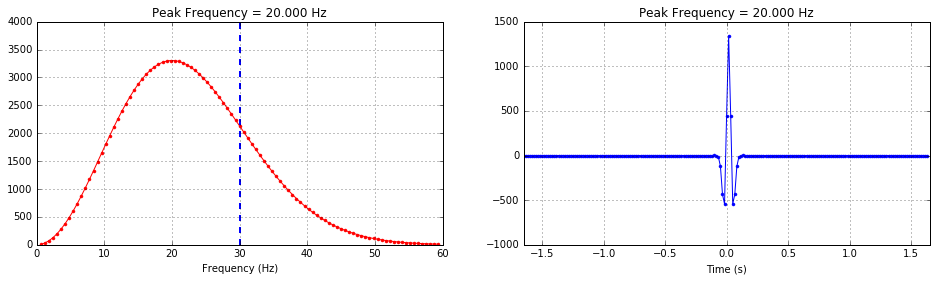

In [80]:
%matplotlib inline

fpeak = freq_peak
print("Peak Freq = " + "{:6.3f}".format(fpeak) + " Hz")
fig, ax1, ax2 = plot_ricker(domega=domega, omega_min=domega, omega_max=2 * omega_max, freq_peak=fpeak)
ax1.plot([0.0, 0.0], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

Peak Freq = 20.000 Hz


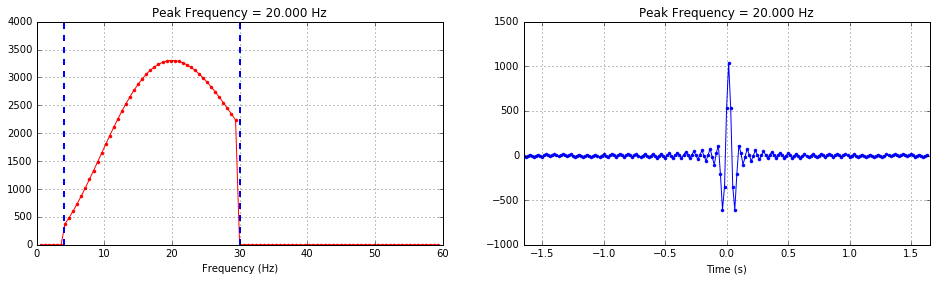

In [81]:
%matplotlib inline

fpeak = freq_peak
print("Peak Freq = " + "{:6.3f}".format(fpeak) + " Hz")
fig, ax1, ax2 = plot_ricker_taper(
    domega=domega, 
    omega_min=domega, 
    omega_max=2 * omega_max, 
    freq_peak=fpeak,
    omega_low=omega_min,
    omega_high=omega_max,
    omega1=omega_min,
    omega2=omega_max
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

Peak Freq = 20.000 Hz


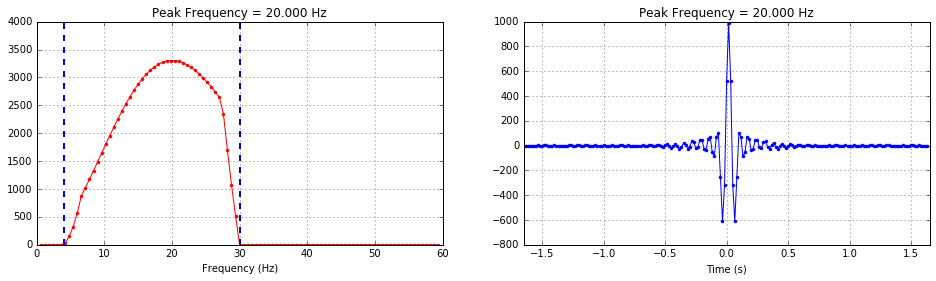

In [82]:
%matplotlib inline

fpeak = freq_peak
print("Peak Freq = " + "{:6.3f}".format(fpeak) + " Hz")
fig, ax1, ax2 = plot_ricker_taper(
    domega=domega, 
    omega_min=domega, 
    omega_max=2 * omega_max, 
    freq_peak=fpeak,
    omega_low=omega_min,
    omega_high=omega_max,
    omega1=omega_min + 0.1 * (omega_max - omega_min),
    omega2=omega_max - 0.1 * (omega_max - omega_min)
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

Peak Freq = 10.000 Hz


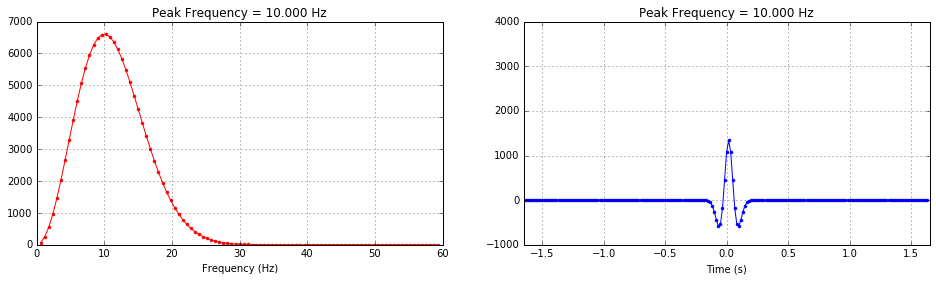

In [83]:
%matplotlib inline

fpeak = freq_peak / 2.0
print("Peak Freq = " + "{:6.3f}".format(fpeak) + " Hz")
fig, ax1, ax2 = plot_ricker(domega=domega, omega_min=domega, omega_max=2 * omega_max, freq_peak=fpeak)
ax1.plot([0.0, 0.0], [0, 4000], '--b', linewidth=2)
ax2.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

Peak Freq = 16.000 Hz


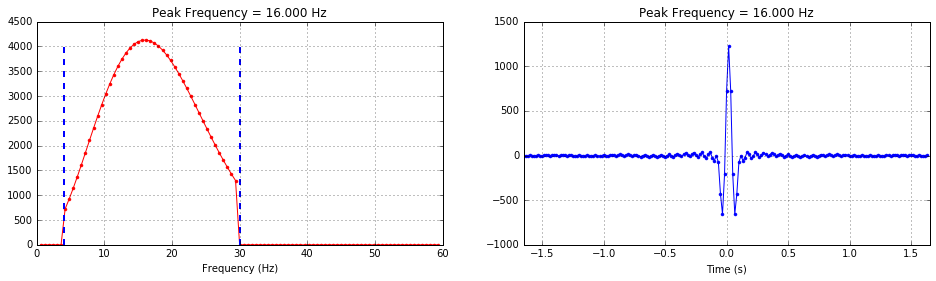

In [84]:
%matplotlib inline

fpeak = freq_peak / 1.25
print("Peak Freq = " + "{:6.3f}".format(fpeak) + " Hz")
fig, ax1, ax2 = plot_ricker_taper(
    domega=domega, 
    omega_min=domega, 
    omega_max=2 * omega_max, 
    freq_peak=fpeak,
    omega_low=omega_min,
    omega_high=omega_max,
    omega1=omega_min,
    omega2=omega_max
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

### Gaussian wavelet

Mean Freq = 20.000 Hz
Std Freq =  3.900 Hz


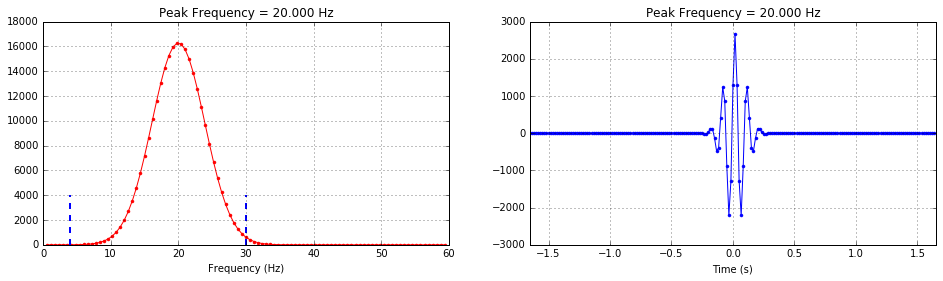

In [85]:
%matplotlib inline

omega_mean = 2 * Common.pi * freq_peak
omega_std = 0.15 * (omega_max - omega_min)
print("Mean Freq = " + "{:6.3f}".format(omega_mean / (2 * Common.pi)) + " Hz")
print("Std Freq = " + "{:6.3f}".format(omega_std / (2 * Common.pi)) + " Hz")
fig, ax1, ax2 = plot_gaussian(
    domega=domega, omega_min=domega, omega_max=2 * omega_max, omega_mean=omega_mean, omega_std=omega_std
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

Mean Freq = 20.000 Hz
Std Freq =  6.500 Hz


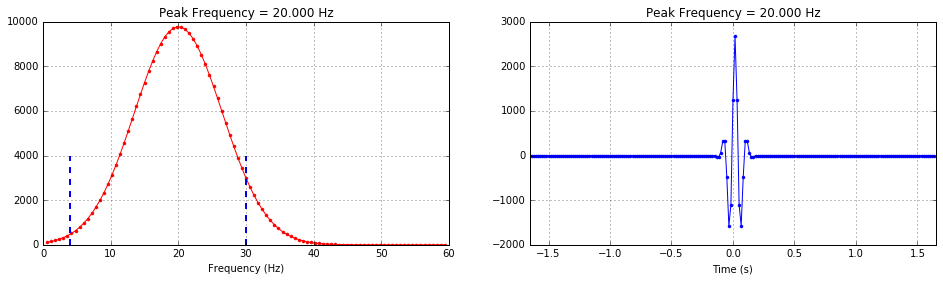

In [86]:
%matplotlib inline

omega_mean = 2 * Common.pi * freq_peak
omega_std = 0.25 * (omega_max - omega_min)
print("Mean Freq = " + "{:6.3f}".format(omega_mean / (2 * Common.pi)) + " Hz")
print("Std Freq = " + "{:6.3f}".format(omega_std / (2 * Common.pi)) + " Hz")
fig, ax1, ax2 = plot_gaussian(
    domega=domega, omega_min=domega, omega_max=2 * omega_max, omega_mean=omega_mean, omega_std=omega_std
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

Mean Freq = 20.000 Hz
Std Freq =  5.200 Hz


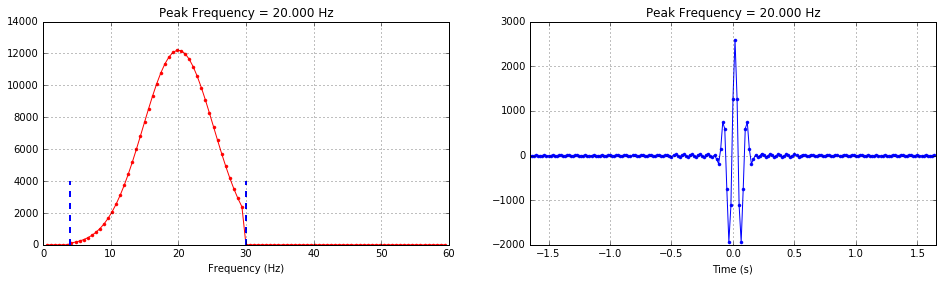

In [87]:
%matplotlib inline

omega_mean = 2 * Common.pi * freq_peak
omega_std = 0.2 * (omega_max - omega_min)
print("Mean Freq = " + "{:6.3f}".format(omega_mean / (2 * Common.pi)) + " Hz")
print("Std Freq = " + "{:6.3f}".format(omega_std / (2 * Common.pi)) + " Hz")
fig, ax1, ax2 = plot_gaussian_taper(
    domega=domega, 
    omega_min=domega, 
    omega_max=2 * omega_max, 
    omega_mean=omega_mean, omega_std=omega_std,
    omega_low=omega_min,
    omega_high=omega_max,
    omega1=omega_min,
    omega2=omega_max
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

Mean Freq = 20.000 Hz
Std Freq =  6.500 Hz


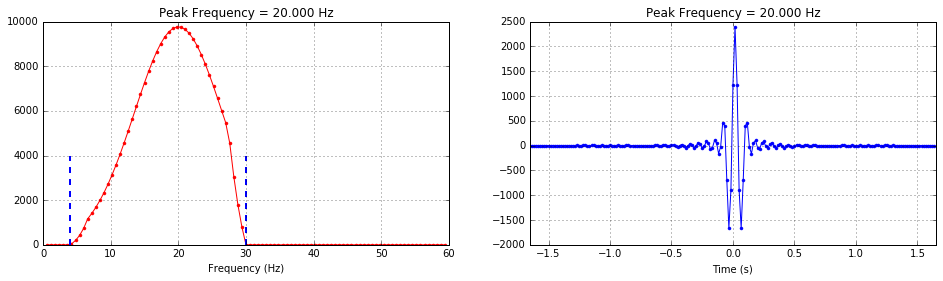

In [88]:
%matplotlib inline

omega_mean = 2 * Common.pi * freq_peak
omega_std = 0.25 * (omega_max - omega_min)
print("Mean Freq = " + "{:6.3f}".format(omega_mean / (2 * Common.pi)) + " Hz")
print("Std Freq = " + "{:6.3f}".format(omega_std / (2 * Common.pi)) + " Hz")
fig, ax1, ax2 = plot_gaussian_taper(
    domega=domega, 
    omega_min=domega, 
    omega_max=2 * omega_max, 
    omega_mean=omega_mean, omega_std=omega_std,
    omega_low=omega_min,
    omega_high=omega_max,
    omega1=omega_min + 0.1 * (omega_max - omega_min),
    omega2=omega_max - 0.1 * (omega_max - omega_min)
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4000], '--b', linewidth=2)

### Flatspec wavelet

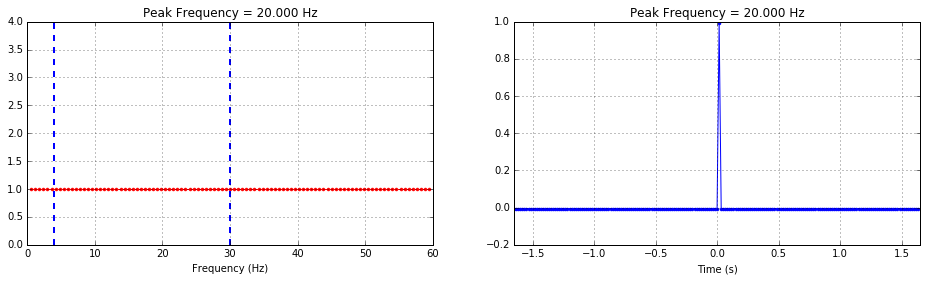

In [89]:
fig, ax1, ax2 = plot_flatspec(domega=domega, omega_min=domega, omega_max=2 * omega_max)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4], '--b', linewidth=2)

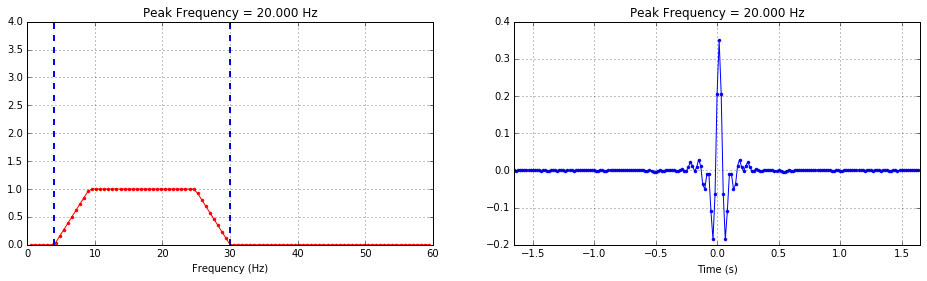

In [90]:
fig, ax1, ax2 = plot_flatspec_taper(
    domega=domega, 
    omega_min=domega, 
    omega_max=2 * omega_max,
    omega_low=omega_min,
    omega_high=omega_max,
    omega1=omega_min + 0.2 * (omega_max - omega_min),
    omega2=omega_max - 0.2 * (omega_max - omega_min)
)
ax1.plot([(omega_min / (2 * Common.pi)), (omega_min / (2 * Common.pi))], [0, 4], '--b', linewidth=2)
ax1.plot([(omega_max / (2 * Common.pi)), (omega_max / (2 * Common.pi))], [0, 4], '--b', linewidth=2)